# Word Embeddings
## mit Gensim (v. 4.3.2)

Siehe Dokumentation: https://radimrehurek.com/gensim/models/word2vec.html

In [ ]:
#!pip install --upgrade gensim
#!pip install --upgrade wikipedia #https://www.thepythoncode.com/article/access-wikipedia-python 

In [1]:
from gensim.test.utils import common_texts
from gensim.models import Word2Vec
from gensim.models import KeyedVectors

import wikipedia
import numpy as np

### Ein neues Modell trainieren
Hier mit Spielzeugdaten

In [2]:
model = Word2Vec(sentences=common_texts, vector_size=100, window=5, min_count=1, workers=4)

Wie müssen also die Inputdaten für Word2Vec aussehen?

In [3]:
print(common_texts)

[['human', 'interface', 'computer'], ['survey', 'user', 'computer', 'system', 'response', 'time'], ['eps', 'user', 'interface', 'system'], ['system', 'human', 'system', 'eps'], ['user', 'response', 'time'], ['trees'], ['graph', 'trees'], ['graph', 'minors', 'trees'], ['graph', 'minors', 'survey']]


Wofür sind die folgenden Parameter?
* vector_size
* window
* min_count
* workers  

In [4]:
#Modelle können abgespeichert und wieder geladen werden
model.save("word2vec.model")
model = Word2Vec.load("word2vec.model")

"The trained word vectors are stored in a KeyedVectors instance, as model.wv:" 

In [5]:
vector = model.wv['computer']
print(vector)

[-0.00515774 -0.00667028 -0.0077791   0.00831315 -0.00198292 -0.00685696
 -0.0041556   0.00514562 -0.00286997 -0.00375075  0.0016219  -0.0027771
 -0.00158482  0.0010748  -0.00297881  0.00852176  0.00391207 -0.00996176
  0.00626142 -0.00675622  0.00076966  0.00440552 -0.00510486 -0.00211128
  0.00809783 -0.00424503 -0.00763848  0.00926061 -0.00215612 -0.00472081
  0.00857329  0.00428459  0.0043261   0.00928722 -0.00845554  0.00525685
  0.00203994  0.0041895   0.00169839  0.00446543  0.0044876   0.0061063
 -0.00320303 -0.00457706 -0.00042664  0.00253447 -0.00326412  0.00605948
  0.00415534  0.00776685  0.00257002  0.00811905 -0.00138761  0.00808028
  0.0037181  -0.00804967 -0.00393476 -0.0024726   0.00489447 -0.00087241
 -0.00283173  0.00783599  0.00932561 -0.0016154  -0.00516075 -0.00470313
 -0.00484746 -0.00960562  0.00137242 -0.00422615  0.00252744  0.00561612
 -0.00406709 -0.00959937  0.00154715 -0.00670207  0.0024959  -0.00378173
  0.00708048  0.00064041  0.00356198 -0.00273993 -0.0

In [6]:
print(model.wv)

KeyedVectors<vector_size=100, 12 keys>


Was sind die Keys?

In [7]:
print(model.wv.key_to_index)

{'system': 0, 'graph': 1, 'trees': 2, 'user': 3, 'minors': 4, 'eps': 5, 'time': 6, 'response': 7, 'survey': 8, 'computer': 9, 'interface': 10, 'human': 11}


"If you don’t need the full model state any more (don’t need to continue training), its state can be discarded, keeping just the vectors and their keys proper. This results in a much smaller and faster object that can be mmapped for lightning fast loading and sharing the vectors in RAM between processes:"

In [8]:
# Store just the words + their trained embeddings.
word_vectors = model.wv
word_vectors.save("word2vec.wordvectors")
# Load back with memory-mapping = read-only, shared across processes.
wv = KeyedVectors.load("word2vec.wordvectors", mmap='r')
vector = wv['computer']  # Get numpy vector of a word
del model

### Exploring Embeddings

Documentation: https://radimrehurek.com/gensim/models/keyedvectors.html 

Was machen die Funktionen jeweils?

In [17]:
wv.most_similar('computer', topn=10)

[('system', 0.21617139875888824),
 ('survey', 0.04468922317028046),
 ('interface', 0.015203381888568401),
 ('time', 0.0019510635174810886),
 ('trees', -0.03284316882491112),
 ('human', -0.07424270361661911),
 ('response', -0.09317591041326523),
 ('graph', -0.09575342386960983),
 ('eps', -0.10513808578252792),
 ('user', -0.16911619901657104)]

In [10]:
wv.closer_than('computer', 'trees')

['system', 'time', 'survey', 'interface']

In [11]:
wv.similarity('computer', 'system')

0.21617141

In [12]:
wv.distance('computer', 'system')

0.7838285863399506

In [13]:
wv.doesnt_match(['computer'])

'computer'

In [14]:
wv.key_to_index

{'system': 0,
 'graph': 1,
 'trees': 2,
 'user': 3,
 'minors': 4,
 'eps': 5,
 'time': 6,
 'response': 7,
 'survey': 8,
 'computer': 9,
 'interface': 10,
 'human': 11}

In [15]:
wv.index_to_key

['system',
 'graph',
 'trees',
 'user',
 'minors',
 'eps',
 'time',
 'response',
 'survey',
 'computer',
 'interface',
 'human']

### Vortrainierte Embeddings laden

Jetzt schauen wir uns mal "echte Embeddings" an, die auf großen Datenmengen trainiert wurden.  
Laden Sie **deutsche** FastText Embeddings herunter: https://fasttext.cc/docs/en/crawl-vectors.html#models (txt format)  
Achtung: Die Datei ist etwa 1.3 GB groß und wird als gezippte Datei heruntergeladen (.gz), die zunächst entpackt werden muss. Die resultierende Datei ist dann etwa 4.5 GB groß.

**FastText**: "We distribute pre-trained word vectors for 157 languages, trained on Common Crawl and Wikipedia using fastText. These models were trained using CBOW with position-weights, in dimension 300, with character n-grams of length 5, a window of size 5 and 10 negatives."

Training auf Character N-Grammen bedeutet: Auch Wörter mit Rechtschreibfehlern können erkannt werden!

In [18]:
#Wir laden hier nur die ersten 100,000 Vektoren um Ladezeit zu sparen
wv = KeyedVectors.load_word2vec_format("cc.de.300.vec", limit=100000)

In [19]:
len(wv.index_to_key)

100000

In [20]:
wv.most_similar("Bochum")

[('Dortmund', 0.7903062701225281),
 ('Bielefeld', 0.785017728805542),
 ('Gelsenkirchen', 0.7421029210090637),
 ('Duisburg', 0.7412689328193665),
 ('Herne', 0.7374927997589111),
 ('Bottrop', 0.7231398224830627),
 ('Hattingen', 0.7158040404319763),
 ('Recklinghausen', 0.7055079340934753),
 ('Gladbeck', 0.7039979100227356),
 ('Wattenscheid', 0.691122829914093)]

In [ ]:
#wv.most_similar("Bohcum")

Out-of-vocabulary words can only be obtained when downloading the bin-files rather than txt-files

In [21]:
wv.most_similar("Hamburg")

[('Altona', 0.7558231353759766),
 ('Bergedorf', 0.7234967350959778),
 ('Bremen', 0.7169299721717834),
 ('Lüneburg', 0.7042407393455505),
 ('Berlin', 0.7024208307266235),
 ('Wandsbek', 0.7005006074905396),
 ('Norderstedt', 0.6989949345588684),
 ('Kiel', 0.6943677663803101),
 ('Lübeck', 0.6940171718597412),
 ('Harburg', 0.6926769614219666)]

In [24]:
wv.doesnt_match(["Montag", "Dienstag", "Donnerstag", "Dezember"])

'Dezember'

In [25]:
wv.doesnt_match(["Apfel", "Banane", "Kirsche", "Kartoffel"])

'Kirsche'

In [26]:
wv.most_similar(positive=['Frankreich', 'Rom'], negative=['Paris'])

[('Italien', 0.7758052349090576),
 ('Spanien', 0.6313459277153015),
 ('Latium', 0.6121785044670105),
 ('Griechenland', 0.5853964686393738),
 ('Süditalien', 0.5821914076805115),
 ('Norditalien', 0.5806383490562439),
 ('Deutschland', 0.5620588064193726),
 ('Roms', 0.5564154386520386),
 ('Italiens', 0.5485419631004333),
 ('Kirchenstaat', 0.5464210510253906)]

Auf die Reihenfolge achten!

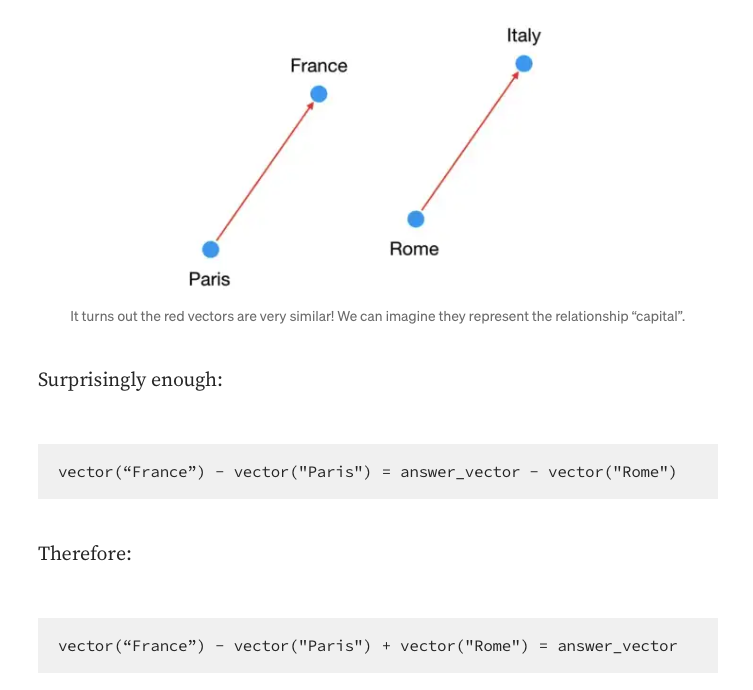
Quelle: https://medium.com/swlh/playing-with-word-vectors-308ab2faa519

**Aufgabe**: Bilden Sie die folgende Analogie: Koch - männlich, X - weiblich

In [28]:
#Lösung
wv.most_similar(positive=['Koch', 'weiblich'], negative=['männlich'])

[('Köchin', 0.6477569937705994),
 ('Kellner', 0.6103442311286926),
 ('Kochs', 0.6044445037841797),
 ('Schmidt', 0.5862055420875549),
 ('Schneider', 0.5827876925468445),
 ('Köhler', 0.5792646408081055),
 ('Zimmermann', 0.5751679539680481),
 ('Küchenchef', 0.5742059350013733),
 ('Lehmann', 0.5691910982131958),
 ('Gerlach', 0.5630943179130554)]

**Aufgabe**: Bilden Sie die folgende Analogie: Hausfrau - Frau, X - Mann \
oder: Hausfrau - weiblich, X - männlich

In [29]:
# Lösung
wv.most_similar(positive=['Hausfrau', 'Mann'], negative=['Frau'])

[('Hausfrauen', 0.6236591935157776),
 ('Familienvater', 0.6016473770141602),
 ('Kerl', 0.5521509051322937),
 ('Rentner', 0.5439653992652893),
 ('Geschäftsmann', 0.5377076268196106),
 ('Ehemann', 0.5348390936851501),
 ('Haushalt', 0.525500476360321),
 ('Elektriker', 0.522422730922699),
 ('Handwerker', 0.5205515027046204),
 ('Vater', 0.5066394805908203)]

**Mittleren Vektor bestimmen**

In [30]:
words = ["Hauptstadt", "Deutschland"]
vec = wv.get_mean_vector(words)

In [31]:
wv.similar_by_vector(vec)

[('Deutschland', 0.8027850389480591),
 ('Hauptstadt', 0.8027849793434143),
 ('Bundesrepublik', 0.6924480199813843),
 ('Deutschlands', 0.6702033877372742),
 ('Bundeshauptstadt', 0.6667576432228088),
 ('Berlin', 0.6532673239707947),
 ('Metropole', 0.6397574543952942),
 ('Europa', 0.6315183043479919),
 ('Landeshauptstadt', 0.6278564929962158),
 ('Republik', 0.6275584697723389)]

## Aufgabe:
Lassen Sie den Computer mithilfe von Word Embeddings folgende Fragen beantworten:
- ` Wann wurde die RUB gegründet ?`  
- ` Seit wann gibt es keine Studiengebühren mehr ?`
- ` Welche Gerüchte gibt es über die RUB  ?`  

Der Computer darf dafür auch im Wikipedia-Artikel über die RUB nachschlagen... :)  
Es reicht, wenn der Computer einen Satz zurückliefert, in dem die richtige Antwort enthalten ist.

Tipp: Auch für ganze Sätze kann man einen mittleren Vektor bestimmen.

#### Zugriff auf einen Wikipedia-Artikel

In [32]:
wikipedia.set_lang('de')

In [ ]:
rub = wikipedia.search("Ruhr-Universität Bochum")
rub

In [34]:
article = wikipedia.page("Ruhr-Universität Bochum")

In [ ]:
article.content

In [49]:
# Your code goes here
from nltk import sent_tokenize
from nltk import word_tokenize
from nltk.corpus import stopwords
from gensim.models import Word2Vec
from gensim.models import KeyedVectors
import numpy as np
import wikipedia
import re

# Load our word vectors
wv = KeyedVectors.load_word2vec_format("cc.de.300.vec", limit=100000)

In [46]:
# Create an array of questions
questions = ['Wann wurde die RUB gegründet', 'Seit wann gibt es keine Studiengebühren mehr', 'Welche Gerüchte gibt es über die RUB']

# Remove question marks
for idx, question in enumerate(questions):
    questions[idx] = question.replace("?", "")

tokenizedQuestions = [word_tokenize(question, language='german') for question in questions]

# Vectorize each question by computing the mean of all words in it 
questionVectors = [wv.get_mean_vector(question) for question in tokenizedQuestions]

In [53]:
# Create two parallel lists of sentences and sentence vectors from all RUB wikipedia articles
wikipedia.set_lang('de')
articleNames = wikipedia.search("Ruhr-Universität Bochum")

sentences = []
# Itterate over all RUB articles to gather the sentences
for articleName in articleNames:
    article = wikipedia.page(articleName)
    # Clean up the article (remove Section names and tabs)
    text = re.sub(r'==.*==',' ', article.content)
    text = text.replace("\t"," "). replace("\n", " ")
    # Split the article into sentences and append them to the sentence list
    sentences.extend(sent_tokenize(text, language='german'))

tokenizedSentences = [word_tokenize(sentence, language='german') for sentence in sentences]

# Vectorize each sentence
sentenceVectors = [wv.get_mean_vector(sentenceTokens) for sentenceTokens in tokenizedSentences]

In [54]:
# Find the nearest sentence vector to each question vector
for idx, qVector in enumerate(questionVectors):
    cosSimilarities = wv.cosine_similarities(qVector, sentenceVectors)
    # print(np.argmax(cosSimilarities))
    print(questions[idx], "?")
    print(sentences[np.argmax(cosSimilarities)])
    print("\n")

Wann wurde die RUB gegründet ?
Die meisten Hochschulen sind jedoch in den 1960er und 1970er Jahren gegründet worden: 1962 wurde die Ruhr-Universität Bochum gegründet, 1968 die Universität Dortmund.


Seit wann gibt es keine Studiengebühren mehr ?
Zum Wintersemester 2011/12 fielen die Studiengebühren in NRW weg, sodass seitdem nur noch der Sozialbeitrag zu zahlen ist.


Welche Gerüchte gibt es über die RUB ?
Auf einer Karte betrachtet könnte man das Ruhrgebiet für eine einzige Großstadt halten, da es, zumindest in der West-Ost-Ausdehnung, keine erkennbaren Grenzen zwischen den einzelnen Städten gibt.




### Weitere Infos

Einigie Datensätze oder sogar vortrainierte Modelle (fürs Englische!) können direkt über Gensim heruntergeladen werden, siehe: https://github.com/RaRe-Technologies/gensim-data 

In [ ]:
import gensim.downloader as api
api.info()  # show info about available models/datasets

In [ ]:
model = api.load("glove-twitter-25")  # download the model and return as object ready for use

In [ ]:
model.most_similar("cat")